<a href="https://colab.research.google.com/github/zahra75koosha/zahra-koosha/blob/master/hoda_dataset_handwritten_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 uninstall tensorflow
!pip3 install tensorflow.gpu==2.0.0

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
%cd /content/drive/My Drive/hoda dataset
%ls

/content/drive/My Drive/hoda dataset
 cnn_model.h5             __pycache__/          'Test 20000.cdb'
 hoda_dataset_helper.py   RemainingSamples.cdb  'Train 60000.cdb'


In [542]:
from hoda_dataset_helper import read_hoda
from hoda_dataset_helper import __read_hoda_dataset
from hoda_dataset_helper import __read_hoda_cdb

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(2)

import tensorflow as tf
from tensorflow.keras import Model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten,GlobalAveragePooling2D

Using TensorFlow backend.


Load Dataset

In [0]:
# Reading train dataset 
X_train, Y_train = __read_hoda_dataset(dataset_path='./Train 60000.cdb',
                                images_height=32,
                                images_width=32,
                                one_hot=True, # set one hot= True to encode training_label to one hot vector
                                reshape=True)

In [0]:
# reading test dataset
X_test, Y_test = __read_hoda_dataset(dataset_path='./Test 20000.cdb',
                              images_height=32,
                              images_width=32,
                              one_hot=True,
                              reshape=False)

In [0]:
# Reading remain dataset 
X_remain, Y_remain = __read_hoda_dataset('./RemainingSamples.cdb',
                                             images_height=32,
                                             images_width=32,
                                             one_hot=True,
                                             reshape=True)

In [0]:
# reading train image
train_images, train_labels = __read_hoda_cdb('./Train 60000.cdb')

In [0]:
# reading test image
test_images, test_labels = __read_hoda_cdb('./Test 20000.cdb')

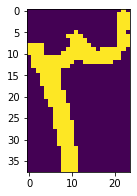

In [548]:
# plot a data sample

fig = plt.figure(figsize=(15, 3))
plt.imshow(train_images[12])

In [0]:
#normalization
X_train =X_train / 255.0
X_test = X_test /255.0
X_remain= X_remain /255.0

In [0]:
# reshape the train and remain samples to 3 dimension
X_train=X_train.reshape(-1,32,32,1)
X_remain=X_remain.reshape(-1,32,32,1)


In [551]:
print(f'shape of X_train : {X_train.shape}')
print(f'shape of Y_train : {Y_train.shape}')

print(f'shape of X_test i: {X_test.shape}')
print(f'shape of Y_test  : {Y_test.shape}')

print(f'shape of X_reamin : {X_remain.shape}')
print(f'shape of Y_remain : {Y_remain.shape}')

shape of X_train : (60000, 32, 32, 1)
shape of Y_train : (60000, 10)
shape of X_test i: (20000, 32, 32, 1)
shape of Y_test  : (20000, 10)
shape of X_reamin : (22352, 32, 32, 1)
shape of Y_remain : (22352, 10)


In [0]:
# split training dataset to validation and train samples
random_seed=2
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val= train_test_split(X_train,Y_train,test_size=0.1, random_state=random_seed)

In [553]:
print(f'shape of X_val is : {X_val.shape}')
print(f'shape of Y_val is : {Y_val.shape}')

shape of X_val is : (6000, 32, 32, 1)
shape of Y_val is : (6000, 10)


CNN model

In [0]:
model= Sequential()

model.add(Conv2D(32,(5,5), activation='relu', padding='same', input_shape=(32,32,1)))
model.add(Conv2D(32,(5,5), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32,(3,3), activation='relu', padding='same'))#


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [565]:
model.summary()

Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_348 (Conv2D)          (None, 32, 32, 32)        832       
_________________________________________________________________
conv2d_349 (Conv2D)          (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_187 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_350 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_188 (MaxPoolin (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_177 (Dropout)        (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_351 (Conv2D)          (None, 8, 8, 32)        

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [0]:
epochs = 40
batch_size = 32

In [569]:
result=model.fit(X_train, Y_train,epochs=epochs, batch_size=batch_size, 
                 validation_data=(X_val,Y_val), verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/40
54000/54000 [==============================] - 25s 470us/sample - loss: 0.2043 - accuracy: 0.9323 - val_loss: 0.0408 - val_accuracy: 0.9873
Epoch 2/40
54000/54000 [==============================] - 24s 446us/sample - loss: 0.0443 - accuracy: 0.9869 - val_loss: 0.0332 - val_accuracy: 0.9900
Epoch 3/40
54000/54000 [==============================] - 24s 448us/sample - loss: 0.0341 - accuracy: 0.9899 - val_loss: 0.0285 - val_accuracy: 0.9920
Epoch 4/40
54000/54000 [==============================] - 24s 447us/sample - loss: 0.0306 - accuracy: 0.9915 - val_loss: 0.0269 - val_accuracy: 0.9927
Epoch 5/40
54000/54000 [==============================] - 24s 447us/sample - loss: 0.0297 - accuracy: 0.9918 - val_loss: 0.0282 - val_accuracy: 0.9910
Epoch 6/40
54000/54000 [==============================] - 24s 444us/sample - loss: 0.0272 - accuracy: 0.9926 - val_loss: 0.0270 - val_accuracy: 0.9925
Epoch 7/40
54000/54000 [=====================

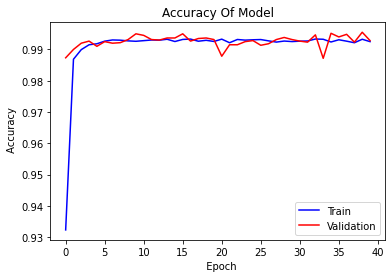

In [570]:
plt.plot(result.history['accuracy'], color='b', label='training accuracy')
plt.plot(result.history['val_accuracy'], color='r', label='validation accuracy')

plt.title('Accuracy Of Model')
plt.ylabel(' Accuracy')
plt.xlabel('  Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

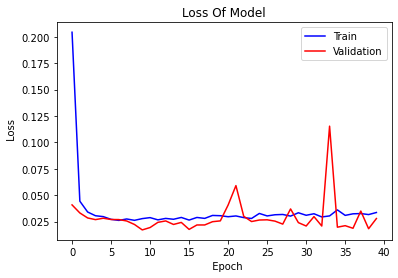

In [571]:

plt.plot(result.history['loss'], color='b', label='training loss')
plt.plot(result.history['val_loss'], color='r', label='validation loss')

plt.title('Loss Of Model')
plt.ylabel(' Loss')
plt.xlabel('  Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [572]:
model.evaluate(X_val, Y_val, verbose=1)

6000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.027919681627214192, 0.9928333]

In [573]:
model.evaluate(X_test, Y_test, verbose=1)

20000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.06677344999641469, 0.9885]

In [0]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis = 1)

y_pred = pd.Series(y_pred,name="Label")

In [577]:
y_pred[2000]

1

In [581]:
model.save("hoda_dataset_handwrite_recognition.py")

INFO:tensorflow:Assets written to: hoda_dataset_handwrite_recognition.py/assets


In [0]:
model.save_weights("cnn_weight.py")


In [0]:
model_2.summary()



Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_170 (Conv2D)          (None, 32, 32, 32)        832       
_________________________________________________________________
conv2d_171 (Conv2D)          (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_113 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_172 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_114 (MaxPoolin (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_90 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_173 (Conv2D)          (None, 8, 8, 64)        